<a href="https://colab.research.google.com/github/kunal51298/Hotel-booking-analysis/blob/main/Individual_Capstone_Hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem statement 

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This hotel booking dataset can help you explore those questions!

Content:

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
%matplotlib inline

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/capstone 1/'
hotel_booking_df=pd.read_csv(path+'Hotel_Bookings.csv')

###getting some basic info about dataset by using pandas methods


In [ ]:
hotel_booking_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_booking_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_booking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
hotel_booking_df.shape

(119390, 32)

In [ ]:
hotel_booking_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
hotel_booking_df.value_counts

<bound method DataFrame.value_counts of                hotel  is_canceled  ...  reservation_status  reservation_status_date
0       Resort Hotel            0  ...           Check-Out               2015-07-01
1       Resort Hotel            0  ...           Check-Out               2015-07-01
2       Resort Hotel            0  ...           Check-Out               2015-07-02
3       Resort Hotel            0  ...           Check-Out               2015-07-02
4       Resort Hotel            0  ...           Check-Out               2015-07-03
...              ...          ...  ...                 ...                      ...
119385    City Hotel            0  ...           Check-Out               2017-09-06
119386    City Hotel            0  ...           Check-Out               2017-09-07
119387    City Hotel            0  ...           Check-Out               2017-09-07
119388    City Hotel            0  ...           Check-Out               2017-09-07
119389    City Hotel            0  .

In [ ]:
hotel_booking_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
hotel_booking_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
##statistical missing rate
hotel_booking_df.isnull().sum()/hotel_booking_df.shape[0]

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

###It can be seen that there are a total of four columns with missing values, which are handled as follows:
The children and country columns are filled with the mode of the corresponding column due to the small number of missing;
The agent is missing 16,340, the missing rate is 13.6%, and the number of missing is large, but the agent indicates the booked travel agency, and the missing rate is less than 20%, keep it and fill it with 0, which means there is no travel agency ID;
The company is missing 112593, the missing rate is 94.3%>80%, it does not have the validity of the information value, so it is deleted directly

##From here real work starts
lets jump into it

In [ ]:
##making copy of our original dataset
hotel_booking_df_1=hotel_booking_df.copy()

In [ ]:
hotel_booking_df_1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


#handling missing values
###all the missing values has been handled by various pandas and numpy methods

In [ ]:
hotel_booking_df_1.children.fillna(hotel_booking_df_1.children.mode()[0],inplace=True)
hotel_booking_df_1.country.fillna(hotel_booking_df_1.country.mode()[0],inplace=True)
hotel_booking_df_1.agent.fillna(0,inplace=True)
hotel_booking_df_1.drop('company',inplace=True,axis=1)


In [ ]:
hotel_booking_df_1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
hotel_booking_df_1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

###There are four abnormalities

###There are abnormal data with a total number of occupants of 0 and a total number of occupancy days of 0, and these data need to be filtered and cleaned.
###There are a total of 5 types of meals in meal, among which Undefined / SC-no meal set meal is one type, which needs to be replaced with SC type uniformly
###The occupancy of children and the occupancy of travel agency agents cannot be floating-point numbers, and need to be planned as integer data.
###The average daily charge of the hotel has an outlier greater than 5000, which will seriously affect the descriptive statistics, and the outlier needs to be deleted

In [ ]:
#outlier handling

#occupancy is zero
zero_guest=hotel_booking_df_1[hotel_booking_df_1[['adults','children','babies']].sum(axis=1)==0]
hotel_booking_df_1.drop(zero_guest.index,inplace=True)


#The number of days of stay is 0
zero_days=hotel_booking_df_1[hotel_booking_df_1[['stays_in_weekend_nights','stays_in_week_nights']].sum(axis=1)==0]
hotel_booking_df_1.drop(zero_days.index,inplace=True)


#Meal type undefind/SC Combined
hotel_booking_df_1.replace('undefined','SC',inplace=True)

#children,agent This field cannot be a floating point number, the data type need to be modified
hotel_booking_df_1.children=hotel_booking_df_1.children.astype(int)
hotel_booking_df_1.agent=hotel_booking_df_1.agent.astype(int)


To calculate the actual number of orders, it is necessary to remove those cancelled orders
For better understanding, after data cleaning, separate the data of the two hotels
Separate the non-cancelled order data rh and ch of the two hotels from full_data_cln

In [ ]:
r_h=hotel_booking_df_1.loc[(hotel_booking_df_1['hotel']=='Resort Hotel') & (hotel_booking_df_1['is_canceled']==0)]
c_h= hotel_booking_df_1.loc[(hotel_booking_df_1['hotel']=='City Hotel') & (hotel_booking_df_1['is_canceled']==0)]

hotel_booking_df_1['hotel'].value_counts()

City Hotel      78899
Resort Hotel    39666
Name: hotel, dtype: int64

In [ ]:
hotel_booking_df_1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,0,Transient,107.0,0,0,Check-Out,2015-07-03


To facilitate subsequent analysis, add two new columns
Adding a column of total nights and stays_nights_total

In [ ]:
total_nights=hotel_booking_df_1['stays_in_weekend_nights']+hotel_booking_df_1['stays_in_week_nights']
hotel_booking_df_1.insert(9,'total_night_stays',total_nights)


#Add a column of number_of_peopls
total_peoples=hotel_booking_df_1['adults']+hotel_booking_df_1['babies']+hotel_booking_df_1['children']
hotel_booking_df_1.insert(12,'number_of_people',total_peoples)


In [ ]:
hotel_booking_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118565 entries, 2 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118565 non-null  object 
 1   is_canceled                     118565 non-null  int64  
 2   lead_time                       118565 non-null  int64  
 3   arrival_date_year               118565 non-null  int64  
 4   arrival_date_month              118565 non-null  object 
 5   arrival_date_week_number        118565 non-null  int64  
 6   arrival_date_day_of_month       118565 non-null  int64  
 7   stays_in_weekend_nights         118565 non-null  int64  
 8   stays_in_week_nights            118565 non-null  int64  
 9   total_night_stays               118565 non-null  int64  
 10  adults                          118565 non-null  int64  
 11  children                        118565 non-null  int64  
 12  number_of_people

DATA VISUALIZTION PART STARTS FROM HERE

#1) Room information analysis

##Checking the relationship between hotel type and cancellation

In [ ]:
hotel_booking_df_1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,total_night_stays,adults,children,number_of_people,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,1,0,1,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,1,0,1,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,2,0,2,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,2,0,2,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,2,0,2,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,0,Transient,107.0,0,0,Check-Out,2015-07-03


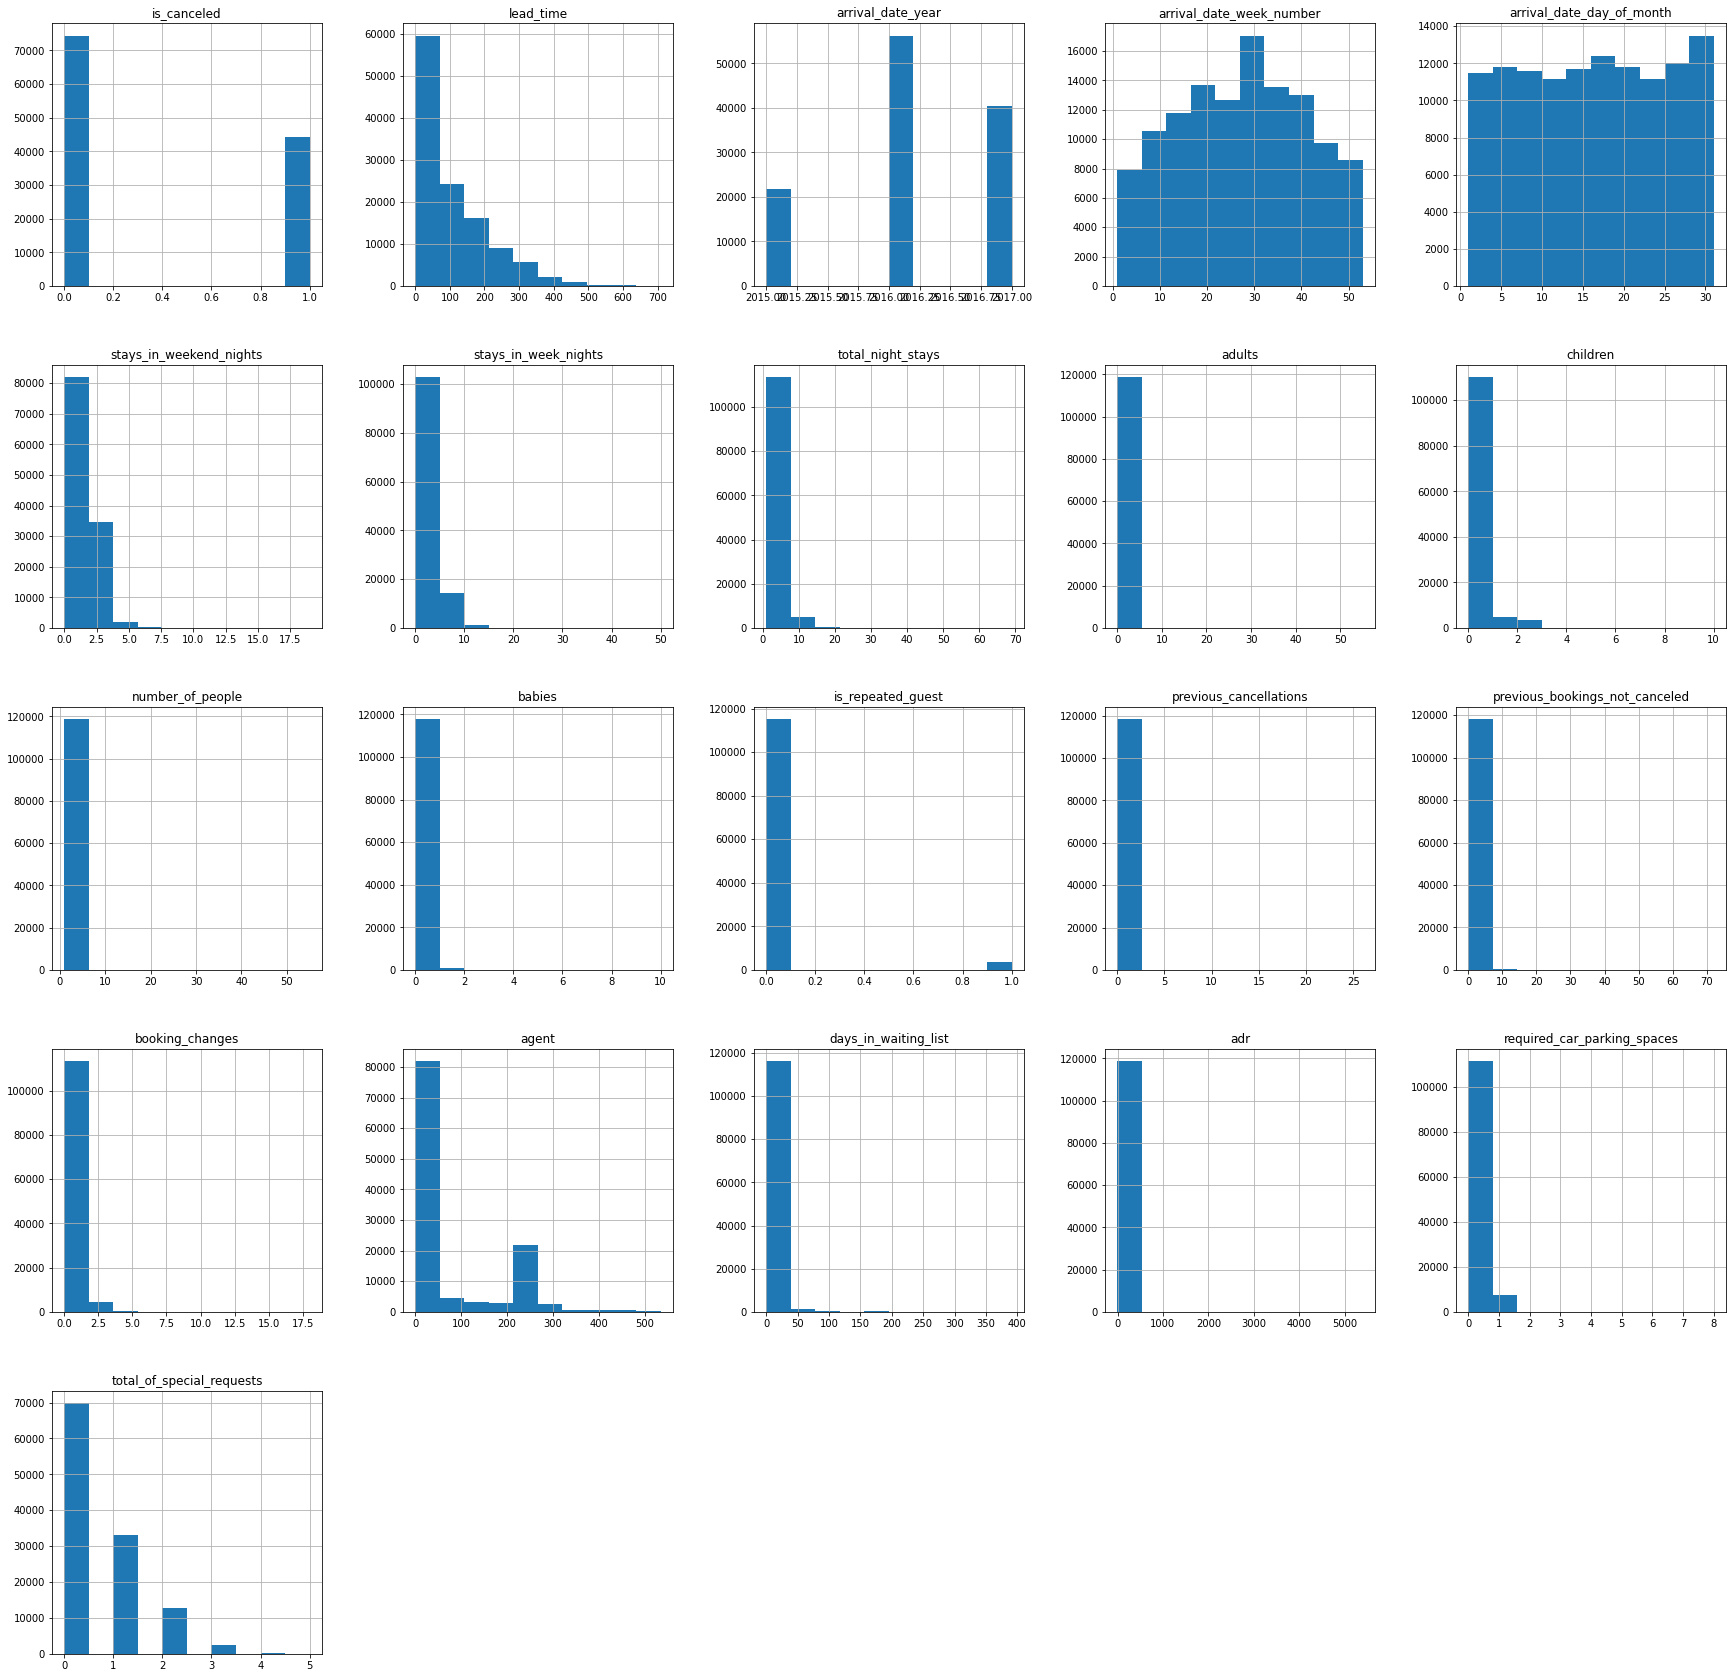

(None,)

In [ ]:
hotel_booking_df_1.hist(figsize=(30,30))
plt.show(),

In [ ]:
hotel_booking_df_1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,total_night_stays,adults,children,number_of_people,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,1,0,1,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,1,0,1,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,2,0,2,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,2,0,2,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,2,0,2,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,0,Transient,107.0,0,0,Check-Out,2015-07-03


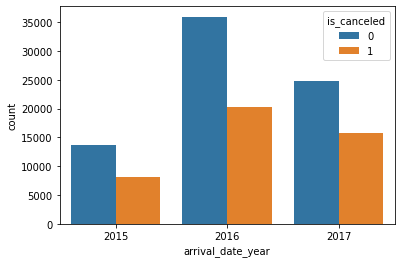

In [ ]:
sns.countplot(x=hotel_booking_df_1['arrival_date_year'],hue=hotel_booking_df_1['is_canceled'])

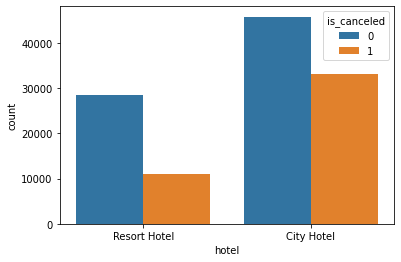

In [ ]:
sns.countplot(x=hotel_booking_df_1['hotel'],hue=hotel_booking_df_1['is_canceled'])

###The order volume of city hotels obviously exceeds that of resort hotels, but at the same time, the possibility of booking cancellation is much higher than that of resort hotels.

##2)Check the relationship between room type and cancellation

In [ ]:
#exploring data frames
#hotel_booking_df_1.groupby(room_type).size()
#hotel_booking_df_1.groupby(roomtype)['is_canceled'].mean()

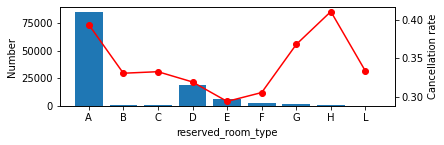

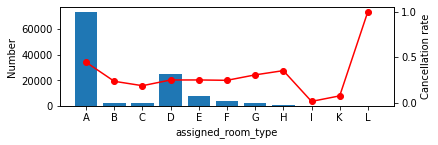

In [ ]:
index=1
for room_type in ['reserved_room_type','assigned_room_type']:
  ax1=plt.subplot(2,1,index)
  index+=1
  ax2=ax1.twinx()  #The axes.twinx() function in axes module of matplotlib library is used to creat a twin axes sharing the xaxis 
  ax1.bar(
      hotel_booking_df_1.groupby(room_type).size().index,
      hotel_booking_df_1.groupby(room_type).size())
  
  ax1.set_xlabel(room_type)
  ax1.set_ylabel('Number')


  ax2.plot(hotel_booking_df_1.groupby(room_type)['is_canceled'].mean(),'ro-')
  ax2.set_ylabel('Cancellation rate')
  plt.show()

###Most of the room types reserved and allocated are concentrated in the four categories A/D/E/F, of which the cancellation rate of category A rooms is about 7-8% higher than the other three categories, which is worthy of attention.

##3)The effect of room type changes on cancellation

In [ ]:
hotel_booking_df_1['room_changed']=hotel_booking_df_1['reserved_room_type']!=hotel_booking_df_1['assigned_room_type']
hotel_booking_df_1['room_changed']

2          True
3         False
4         False
5         False
6         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: room_changed, Length: 118565, dtype: bool

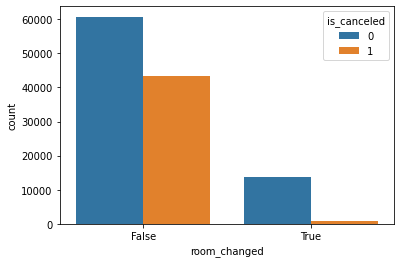

In [ ]:
sns.countplot(x=hotel_booking_df_1['room_changed'],hue=hotel_booking_df_1['is_canceled'])

###Customers who have changed the room type are much less likely to cancel their reservations than those who have not changed. The guessed reason may be:
###The customer is not satisfied with the room type, but in order to ensure normal check-in, they choose to change the room type without canceling the reservation, so the probability of cancellation is low

#3)Customer information analysis

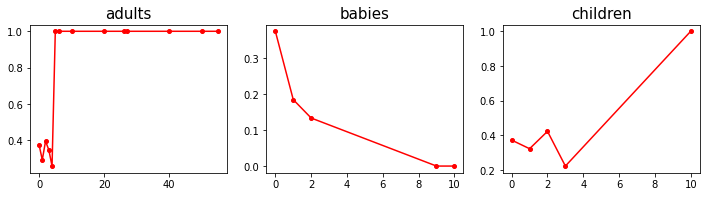

In [ ]:
plt.figure(figsize=(12, 6))

index = 0

for people in ['adults','babies','children']:
  index +=1
  plt.subplot(2, 3, index)
  plt.plot(hotel_booking_df_1.groupby(people)['is_canceled'].mean(),'ro-',ms=4)
  plt.title(people, fontsize=15)

###Most bookings do not have children and infants, and single occupancy and double occupancy are the main number of reservations;
###From above visualization we can see that the cancellation rate of bookings dropped sharply when there is a baby;

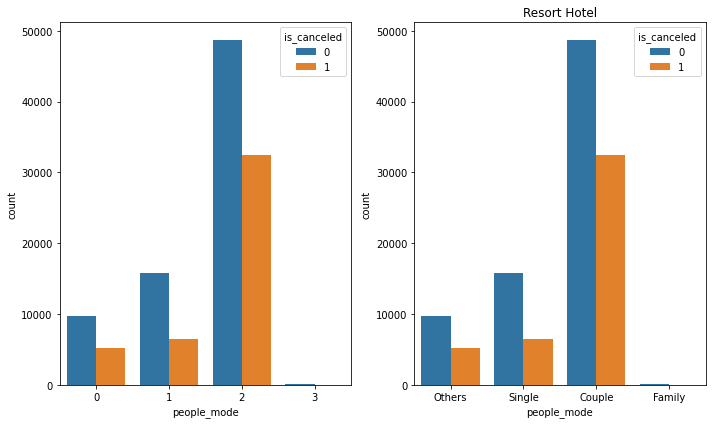

In [ ]:
##Analysis of the number of occupants

# individual
single=(hotel_booking_df_1.adults==1) & (hotel_booking_df_1.children==0) &(hotel_booking_df_1.babies==0)


#couple
couple=(hotel_booking_df_1.adults==2) & (hotel_booking_df_1.children==0) &(hotel_booking_df_1.babies==0)

#family
family=(hotel_booking_df_1.adults>=2) & (hotel_booking_df_1.children>0) &(hotel_booking_df_1.babies>0)


hotel_booking_df_1['people_mode']=single.astype(int)*1 + couple.astype(int) * 2 + family.astype(int) * 3
plt.figure(figsize=(10,6))
index=1
for hotel_kind in ['City Hotel','Resort Hotel']:
  plt.subplot(1,2,index)
  index+=1
  sns.countplot(x=hotel_booking_df_1['people_mode'],
                hue=hotel_booking_df_1['is_canceled'],
                data=hotel_booking_df_1[hotel_booking_df_1.hotel == hotel_kind])
  
plt.xticks([0, 1, 2, 3], ['Others', 'Single', 'Couple', 'Family'])
plt.title(hotel_kind)
plt.tight_layout()
plt.show()


###For different hotels, we focus on the analysis of the cancellation rate of the following occupancy situations: Single occupancy: adults=1, children, babies=0 Double occupancy: adults=2, children, babies=0 Family occupancy: adults>2, children, babies>0
###For city hotels, the cancellation probability: double >> single ≈ family, pay attention to the high cancellation rate of double occupancy customers, and improve the hotel's supporting services for double occupancy customers to reduce the cancellation rate.
###For resort hotels, the probability of cancellation: family>double>single, the hotel can provide corresponding discounts for family customers to increase the occupancy rate of family customers.

In [ ]:
hotel_booking_df_1[hotel_booking_df_1['is_canceled']==1].meal.value_counts()

BB           34486
HB            4983
SC            3943
FB             478
Undefined      286
Name: meal, dtype: int64

Text(0.5, 1.0, 'Uncanceled')

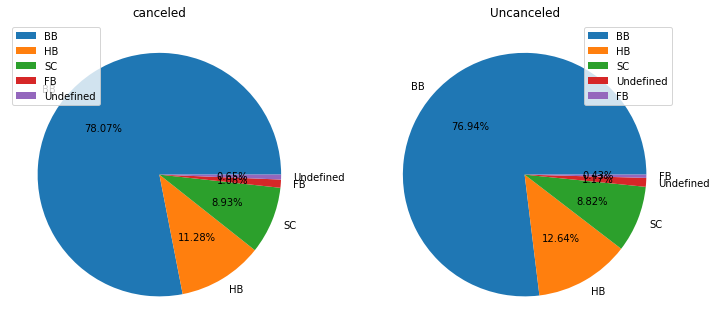

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
labels=hotel_booking_df_1[hotel_booking_df_1['is_canceled']==1].meal.value_counts().index
plt.pie(hotel_booking_df_1[hotel_booking_df_1['is_canceled']==1].meal.value_counts(),labels=labels,autopct="%.2f%%")   #autopct=to get values of pie section
plt.title('canceled')
plt.legend(loc=2)
plt.subplot(122)
labels2=hotel_booking_df_1[hotel_booking_df_1['is_canceled']==0].meal.value_counts().index
plt.pie(hotel_booking_df_1[hotel_booking_df_1['is_canceled']==0].meal.value_counts(),
       labels=labels2 ,
        autopct="%.2f%%")
plt.legend(loc=1)
plt.title('Uncanceled')


###Guests particularly like BB type of meals, followed by HB and SC. It is recommended that hotel owner can purchase HB and SC activities in the BB category to promote guest consumption
###Regardless of whether the reservation is cancelled or not, there is little difference between meal types

#4)country / region

In [ ]:
country_df=pd.DataFrame(hotel_booking_df_1.loc[hotel_booking_df_1['is_canceled']==0]['country'].value_counts())
country_df

,country
PRT,20865
GBR,9644
FRA,8457
ESP,6368
DEU,6067
...,...
FRO,1
DMA,1
MDG,1
ZMB,1


In [ ]:
#Find the number of customers in different countries
country_df.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_df["Number of Guests"].sum()
country_df['%_no_of_guests']=round(country_df['Number of Guests']/total_guests*100,2)
country_df['country']=country_df.index

In [ ]:
fig=px.pie(country_df,
           values='Number of Guests',
           names='country',
           title="Home country of guests",
           template="seaborn"
           )
fig.update_traces(textposition="inside",textinfo='value+percent+label')
fig.show()

In [ ]:
#show on map make a map

guest_map=px.choropleth(country_df,
                        locations=country_df.index,
                        color=country_df['%_no_of_guests'],
                        hover_name=country_df.index,
                        color_continuous_scale=px.colors.sequential.Plasma,
                        
                        title="Home country of guests"
                        )
guest_map.show()


####As can be seen from the figure, customers are mainly from Portugal, the United Kingdom, France, Spain and other European countries. The gap in the cancellation rate between different countries is very significant. The countries with higher cancellation rates include Portugal, Italy, Brazil, China, and Russia, which are developing Country-based.

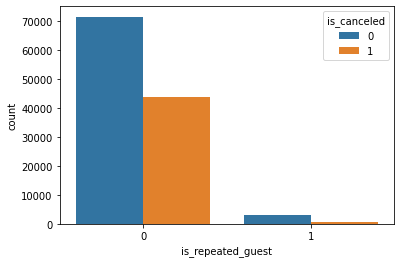

In [ ]:
sns.countplot(x=hotel_booking_df_1['is_repeated_guest'],hue=hotel_booking_df_1['is_canceled'])

####Customer reservation history refers to the customer’s previous reservations, which reflects the customer’s integrity to a certain extent and reflects the current customer’s wishes


####Most reservations come from new customers
####The cancellation probability of returning customers is much lower than that of new customers

####It is recommended to increase the training of new customers and increase the repurchase of hotels, such as maintaining the best price; giving some member rights on the order payment page; continuously distributing coupons to new customers, especially during holidays or local tourist seasons

##6)order information analysis

In [ ]:
#calculate the cancellation rate:

total_cancelations=hotel_booking_df_1['is_canceled'].sum()
r_h_cancellation=hotel_booking_df_1.loc[hotel_booking_df_1['hotel']=='Resort Hotel']['is_canceled'].sum()
c_h_cancellation=hotel_booking_df_1.loc[hotel_booking_df_1['hotel']=='City Hotel']['is_canceled'].sum()


rel_cancellation=total_cancelations/hotel_booking_df_1.shape[0]*100
rel_rh_cancellation=r_h_cancellation/hotel_booking_df_1.shape[0]*100
rel_ch_cancellation=c_h_cancellation/hotel_booking_df_1.shape[0]*100

print(f"total bookings canceled: {total_cancelations:,} ({rel_cancellation:.0f}%)")
print(f"Resort hotel bookings canceled: {r_h_cancellation:,} ({rel_rh_cancellation:.0f} %)")
print(f"City hotel bookings canceled: {c_h_cancellation:,} ({rel_ch_cancellation:.0f} %)")




total bookings canceled: 44,176 (37%)
Resort hotel bookings canceled: 11,110 (9 %)
City hotel bookings canceled: 33,066 (28 %)


####The cancellation rate of city hotel reservations is higher than that of resort hotels, mainly because the main user group of city hotels is business travel users, which are often urgent and unplanned. Hotel reservations are easy without planning and in-depth understanding of the state of the hotel. Blindly book and unsubscribe, so the unsubscribe rate is high. It is recommended to add the "Nearby Preferred" function to the channel platform, and automatically filter and recommend nearby cities with high occupancy rates, high re-occupation rates, high evaluations and other high-quality feedback by entering addresses. City hotels, on the one hand, can provide users with more efficient and convenient recommendation services, and on the other hand, they can also promote platform channels to optimize service content.

#7)book in advance analysis

Text(0, 0.5, 'Cancellation rate')

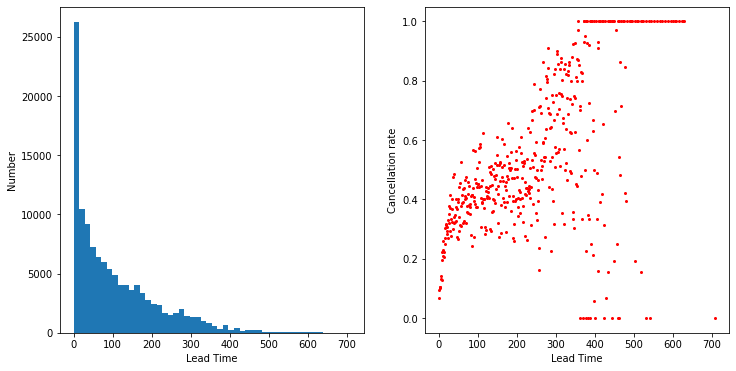

In [ ]:
#distributon of pre-booked duration

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(hotel_booking_df_1['lead_time'],bins=50)
plt.xlabel('Lead Time')
plt.ylabel('Number')


#The effect of booking in advance on cancellation
plt.subplot(122)


plt.plot(
hotel_booking_df_1.groupby('lead_time')['is_canceled'].mean().index,
hotel_booking_df_1.groupby('lead_time')['is_canceled'].mean(),

    
    'ro',
         markersize=2)

plt.xlabel('Lead Time')
plt.ylabel('Cancellation rate')


Customers mainly tend to choose a time close to the check-in time
As the booking advance time increases, the more variable factors there are, the cancellation rate presents an upward trend
The longer the advance booking time, the more variable factors and the higher the cancellation rate.

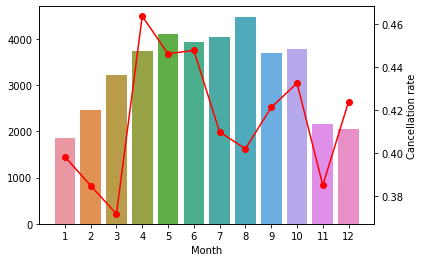

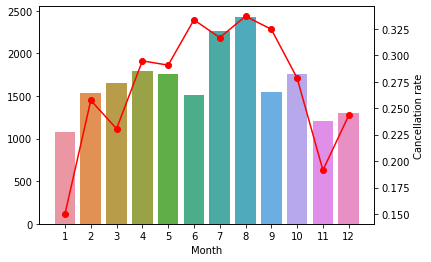

In [ ]:
#Generate a sorted list of months

months = [
    "January", "February", "March", "April", "May", "June", "July", "August",
    "September", "October", "November", "December"
]


for hotel in['City Hotel','Resort Hotel']:
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  df_hotel=hotel_booking_df_1[hotel_booking_df_1.hotel==hotel]
  monthly=df_hotel.groupby('arrival_date_month').size()
  monthly /= 2
  monthly.loc[['July', 'August']]
  sns.barplot(x=list(range(1,13)),y=monthly[months],
              ax=ax1,
              )
  ax2.plot(
              range(12), df_hotel.groupby('arrival_date_month')
    ['is_canceled'].mean()[months].values, 'ro-')
  ax1.set_xlabel('Month')
  ax2.set_ylabel('Cancellation rate')



####In terms of booking volume, city hotels saw a sharp decline in July/August, while resort hotels changed little over the same period. Overall, the monthly passenger flow of resort hotels changed little;

####In terms of cancellation rate, the cancellation rate of the two hotels in winter is relatively low. The cancellation rate of city hotels in summer is lower, but resort hotels are at a peak.

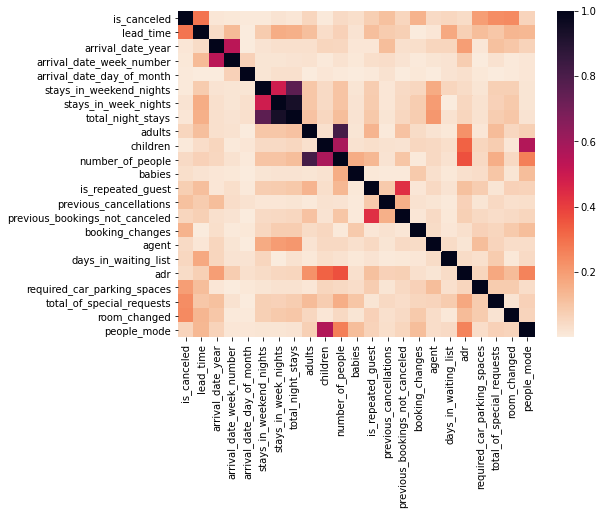

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(hotel_booking_df_1.corr().abs(),cmap=sns.cm.rocket_r)

####The five factors that have a strong correlation with the cancellation rate are:
####lead_time: the number of days booked in advance
####total_of_special_requests: the number of special requests made by customers
####required_car_parking_spaces: the number of parking spaces required by the customer
####booking_changes: the number of changes/modifications made to the booking
####room_changed: room type changed

It  is  essential  to  mention  the  contributor  role  (Individual  for  individualsand team member names, their registered emails, and their contributionforteams

##Team Members:
###1)Bhavesh Vitthal Rikeme    
     email(bhaveshrikame0804@gmail.com)
###2)Kunal Sanjay Borse    
    email(borsekunal055@gmail.com)

#final conclusion

asking right question to dataset is alwyas considered as great quality of data scientist
so we asked some very meaningful questions and plotted graphs and other visualization entities to get insights from data and we come with following conclusions

The order volume of city hotels obviously exceeds that of resort hotels, but at the same time, the possibility of booking cancellation is much higher than that of resort hotels.
Customers mainly tend to choose a time close to the check-in time
Most of the room types reserved and allocated are concentrated in the four categories A/D/E/F,
Customers who have changed the room type are much less likely to cancel their reservations than those who have not changed.
Most bookings do not have children and infants, and single occupancy and double occupancy are the main number of reservations;
 we can see that the cancellation rate of bookings dropped sharply when there is a baby;
Guests particularly like BB type of meals, followed by HB and SC. It is recommended that hotel owner can purchase HB and SC activities in the BB category to promote guest consumption
customers are mainly from Portugal, the United Kingdom, France, Spain and other European countries. 



The cancellation probability of returning customers is much lower than that of new customers

In terms of cancellation rate, the cancellation rate of the two hotels in winter is relatively low. The cancellation rate of city hotels in summer is lower, but resort hotels are at a peak.